<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/03_spatial_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

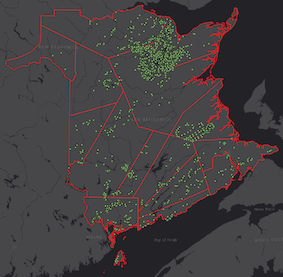

In [1]:
import geopandas as gpd
import pandas as pd
import pooch

In [2]:
nb_drill_holes = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/table/exploration_drillholes_geonb_apr26_2024.csv',
    known_hash='a089f95489a6c7054be13c19ee5f8a691969d94ca395d733e9a5eb7f8735f987'
)

nb_counties = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_county-comte_shp.zip',
    known_hash='2abbb813b5b78f721ea5cc75f4f29a1f27da984476c74fe9f3b3026f41427d6a'
)

In [3]:
counties = gpd.read_file(nb_counties, include_fields=['ENG_NAME'])
print(counties.ENG_NAME.unique())

['Northumberland' 'York' 'Restigouche' 'Victoria' 'Kent' 'Gloucester'
 'Queens' 'Kings' 'Westmorland' 'Madawaska' 'Carleton' 'Charlotte'
 'Sunbury' 'Albert' 'Saint John']


In [4]:
drills = pd.read_csv(nb_drill_holes)

drills = gpd.GeoDataFrame(
    drills[['OBJECTID', 'YEARDRILLED', 'LENGTH_M']],
    geometry=gpd.points_from_xy(drills.X, drills.Y),
    crs='EPSG:4326'
).to_crs(counties.crs)

print(drills.shape)

(17318, 4)


In [5]:
gpd.sjoin(
    drills,
    counties,
    predicate='within'
)

,OBJECTID,YEARDRILLED,LENGTH_M,geometry,index_right,ENG_NAME
0,1,1969.0,44.1960,POINT (2626197.000 7428660.000),13,Albert
1,2,1969.0,34.1376,POINT (2628154.000 7429084.000),13,Albert
2,3,1969.0,20.7264,POINT (2632862.000 7430982.000),13,Albert
3,4,1993.0,41.1000,POINT (2643765.000 7431099.000),13,Albert
4,5,1993.0,43.9000,POINT (2643710.000 7431258.000),13,Albert
...,...,...,...,...,...,...
6579,6617,1964.0,106.0704,POINT (2471130.000 7296186.000),16,Charlotte
6580,6618,1964.0,80.7720,POINT (2470730.000 7297366.000),16,Charlotte
6581,6619,1964.0,202.6920,POINT (2472421.000 7299250.000),16,Charlotte
6582,6620,1964.0,133.1976,POINT (2473731.000 7302280.000),16,Charlotte


# Full Code

In [6]:
"""
Vaasudevan Srinivasan 🧑🏻‍💻
StratagemGIS Solutions
Script to perform spatial join between two vector datasets
"""


import geopandas as gpd
import pandas as pd
import pooch


def spatial_join(nb_drill_holes, counties):

    """
    nb_drill_holes: csv file with x and y coordinates
    counties: shapefile
    """

    # Read the shapefile
    counties = gpd.read_file(nb_counties, include_fields=['ENG_NAME'])
    print(counties.ENG_NAME.unique())
    # ['Northumberland' 'York' 'Restigouche' 'Victoria' 'Kent' 'Gloucester'
    #  'Queens' 'Kings' 'Westmorland' 'Madawaska' 'Carleton' 'Charlotte'
    #  'Sunbury' 'Albert' 'Saint John']

    # Convert the CSV to GeoDataFrame
    drills = pd.read_csv(nb_drill_holes)
    drills = gpd.GeoDataFrame(
        drills[['OBJECTID', 'YEARDRILLED', 'LENGTH_M']],
        geometry=gpd.points_from_xy(drills.X, drills.Y),
        crs='EPSG:4326'
    ).to_crs('EPSG:2953')
    print(drills.shape)  # (17318, 4)

    # Available predicates: contains_properly, crosses, covered_by,
    # within, contains, intersects, touches, covers, overlaps
    return gpd.sjoin(
        drills,
        counties,
        predicate='within'
    )